<a href="https://colab.research.google.com/github/henriquebap/Machine_Learning_HB/blob/main/ExercicioClassificacaoAula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importações

In [50]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np



### Caminho do DataSet para donwload

In [67]:
data_url = 'https://www.kaggle.com/datasets/blastchar/telco-customer-churn'

In [68]:
dados = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Definindo que ira mostrar todas as colunas

In [69]:
pd.set_option('display.max_columns', None)

In [70]:
dados.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


Verificando as informações

In [ ]:
dados.info()

In [72]:
dados.shape

(7043, 21)

Validando se há dados faltantes

In [ ]:
dados.isnull()

Transformando os dados de Yes para 1 e No para 0, melhorar na manipulação e implementação

In [ ]:
#Removendo os valores faltantes
dados.dropna(inplace = True)
#Removendo o custumer ID do dataset
df2 = dados.iloc[:,1:]
#Convertendo o predictor variable em variavel numerica binaria
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Convertendo em Dummy
df_dummies = pd.get_dummies(df2)
df_dummies.head()

In [25]:
dados = dados.replace({'Yes': 1, 'No': 0})

In [ ]:
dados.head()

In [ ]:
dados = dados.drop('customerID', axis=1)


In [66]:
# Check whitespace & remove accordingly
dados['TotalCharges'] = pd.to_numeric(dados.TotalCharges, errors='coerce')
dados.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
dados[np.isnan(dados['TotalCharges'])]


In [60]:
dados[dados['tenure']==0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [62]:
dados.drop(labels=dados[dados['tenure']==0].index, axis=0, inplace=True) # row delelation
dados[dados['tenure']==0].index # now no missing values

Int64Index([], dtype='int64')

In [64]:
dados['TotalCharges'].isnull().sum()

0

In [65]:
dados.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Verificando o churn

Podemos ver que o churn 0 e um churn 1 existe uma diferença gigantesca, então vamos tratar os dados e equilibrar

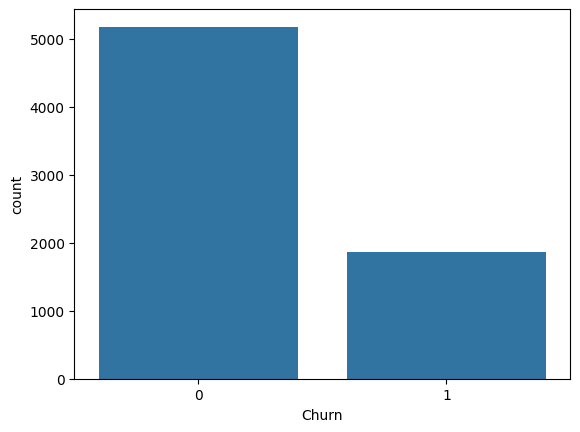

In [28]:
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados)

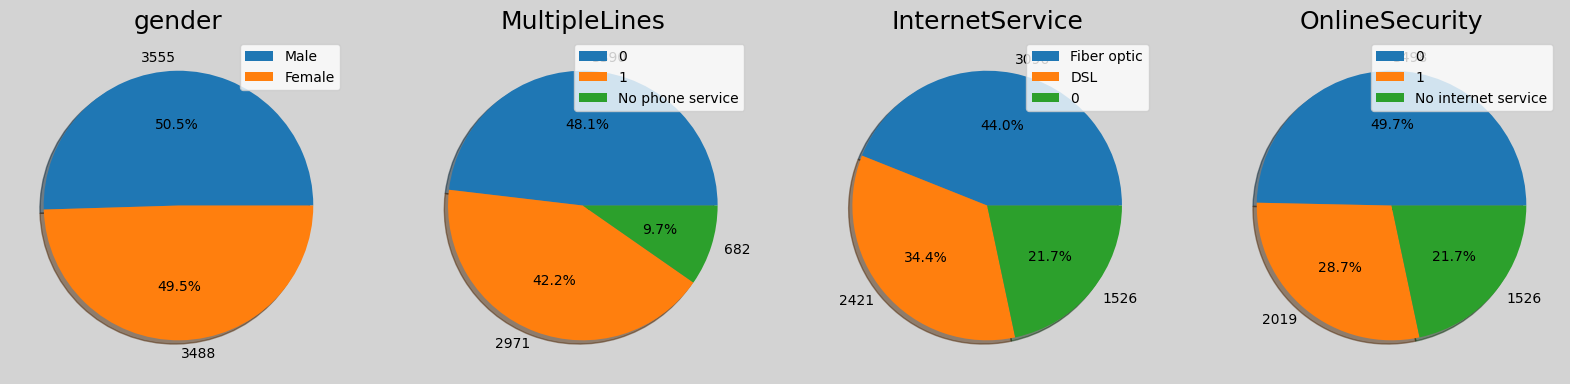

In [41]:
categ_columns = list(dados_sem_id.select_dtypes(include = ['object']).columns)

fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(categ_columns[:4]):
    ax = axes[i]
    d = dados_sem_id[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%",shadow=True)
    ax.set_title(column,size=18)
    ax.legend(d.index)

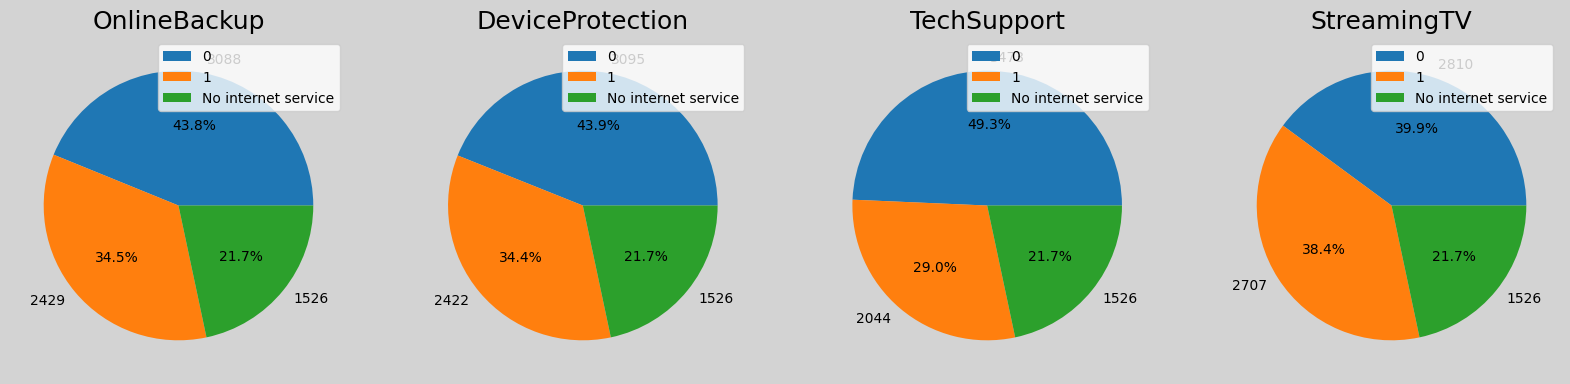

In [43]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12), facecolor="lightgray")


for i, column in enumerate(categ_columns[4:8]):
    ax = axes[i]
    d = dados_sem_id[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%")
    ax.set_title(column,size=18)
    ax.legend(d.index,loc="best")

In [37]:
# Vamos usar a tecnica SMOTE, para isso devemos separar os dados variáveis características e resposta

X = dados_sem_id.drop('Churn', axis=1)
y = dados_sem_id['Churn']

In [38]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X_resampled, y_resampled = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

ValueError: could not convert string to float: 'Female'